In [1]:
!pip install shap
# SHAP
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Example dataset
data = pd.read_csv("/content/drive/MyDrive/LecturesAndSeminars/2024ACMWinterSchool-ExplainableAI/data/titanic/titanic.csv")
X = data[['Age', 'Fare', 'Pclass', 'Sex']]
y = data['Survived']

In [3]:
# Encode categorical variable
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-3-feb0b76f5c05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


RandomForestClassifier()

Expected Value:  [0.44759882 0.55240118]


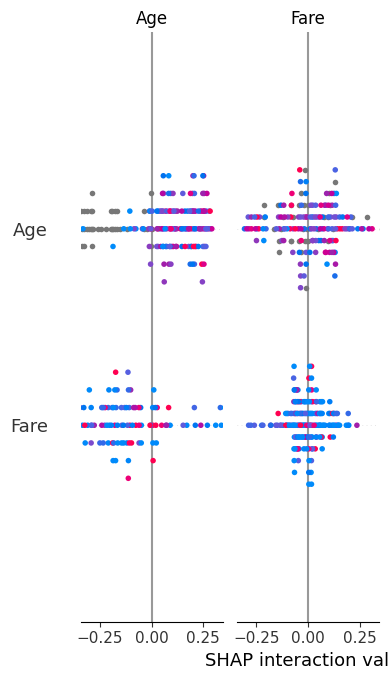

In [29]:
# Create SHAP Explainer
shap.initjs()
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer.shap_values(X_test, check_additivity=False)

print('Expected Value: ', explainer.expected_value)
# Summary plot
shap.summary_plot(shap_values=shap_values, features=X_test, feature_names=X_test.columns)
shap.plots.force(explainer.expected_value[0], shap_values[0, :, 0], X_test.iloc[0, :])

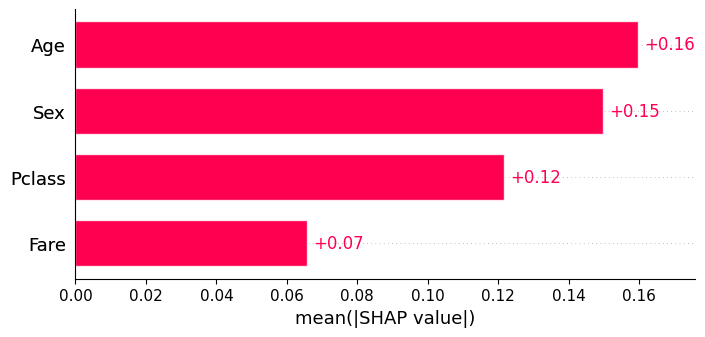

In [34]:
explanation= shap.Explanation(values=shap_values,
                             data=X_test,
                             feature_names=X_test.columns)
shap.plots.bar(explanation[:,:,1], max_display=10)